## 1. Read the dataset

In [261]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display="diagram")

data = pd.read_csv('housing_prices.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Dealing with missing Values

In [262]:
#selecting non-numerical columns
X_cat = data.select_dtypes(exclude="number")

# defining the imputer to use "N_A" as replacement value
cat_imputer = SimpleImputer(strategy="constant", 
                            fill_value="N_A")

# fitting the imputer
cat_imputer.fit(X_cat)

# transforming the data & keeping it as a DataFrame
X_cat_imputed = pd.DataFrame(cat_imputer.transform(X_cat), 
                             columns=X_cat.columns)
X_cat_imputed.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,N_A,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,N_A,N_A,N_A,WD,Normal
1,RL,Pave,N_A,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,N_A,N_A,N_A,WD,Normal
2,RL,Pave,N_A,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,N_A,N_A,N_A,WD,Normal
3,RL,Pave,N_A,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,N_A,N_A,N_A,WD,Abnorml
4,RL,Pave,N_A,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,N_A,N_A,N_A,WD,Normal


In [263]:
#Selecting numerical columns
X_num = data.select_dtypes(include="number")

# Imputing the mean
num_imputer = SimpleImputer(strategy="mean")

# Fitting
num_imputer.fit(X_num)

# Transforming, keeping a DataFrame
X_num_imputed = pd.DataFrame(num_imputer.transform(X_num), 
                             columns=X_num.columns)

X_num_imputed.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [264]:
X_imputed = pd.concat([X_cat_imputed, X_num_imputed], axis=1)
X_imputed.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,RL,Pave,N_A,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,RL,Pave,N_A,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,RL,Pave,N_A,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,RL,Pave,N_A,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,RL,Pave,N_A,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [265]:
X_imputed.isnull().sum().sort_values(ascending=False)

MSZoning        0
SaleType        0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
               ..
Heating         0
BsmtFinType2    0
BsmtFinType1    0
BsmtExposure    0
SalePrice       0
Length: 81, dtype: int64

## 3. Convert Categorical value using Ordinalencoder

In [266]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
category_list = X_imputed.select_dtypes(include="object").columns
print(category_list)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [267]:
for i in category_list:
    X_imputed[i] = LE.fit_transform(X_imputed[i])
X_imputed.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,1,3,3,0,4,0,5,2,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,3,1,1,3,3,0,2,0,24,1,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3,1,1,0,3,0,4,0,5,2,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,3,1,1,0,3,0,0,0,6,2,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,3,1,1,0,3,0,2,0,15,2,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


## 4. Train - test split the data

In [268]:
from sklearn.model_selection import train_test_split

X = X_imputed.drop(columns="SalePrice")
y = X_imputed["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [269]:
X_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
318,3,1,1,3,2,0,4,1,15,2,...,656.0,340.0,60.0,144.0,0.0,0.0,0.0,0.0,4.0,2009.0
580,3,1,1,0,3,0,1,0,12,2,...,572.0,216.0,110.0,0.0,0.0,0.0,0.0,0.0,6.0,2007.0
961,3,1,1,0,3,0,0,0,14,4,...,619.0,550.0,282.0,0.0,0.0,0.0,0.0,0.0,7.0,2008.0
78,3,1,1,3,3,0,4,0,19,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0
5,3,1,1,0,3,0,4,0,11,2,...,480.0,40.0,30.0,0.0,320.0,0.0,0.0,700.0,10.0,2009.0


## 5. Quick baseline models (baseline for performance)

In [270]:
# Decision tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor() # initialize
tree.fit(X_train, y_train)

# K Nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=1) # initialize with parameters
neigh.fit(X_train, y_train) # fit to train set

KNeighborsRegressor(n_neighbors=1)

### 5.1. Performance on the test set

In [271]:
from sklearn.metrics import r2_score

tree_pred = tree.predict(X = X_test) # Decision tree
knn_pred = neigh.predict(X = X_test) # K Nearest neighbors


# create a DataFrame to track performance of the models we try
performances = pd.DataFrame(columns=["performance"])

# add model performances to DataFrame
performances.loc["baseline_tree"] = r2_score(y_test, tree_pred)
performances.loc["baseline_knn"] = r2_score(y_test, knn_pred)

performances

,performance
baseline_tree,0.729477
baseline_knn,0.466942


## 6. Variance Threshold

In [272]:
X.describe().loc[["min", "max"]]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0
max,4.0,1.0,2.0,3.0,3.0,1.0,4.0,2.0,24.0,8.0,...,1418.0,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0


In [273]:
X.var().sort_values()

Utilities       6.849315e-04
Street          4.095505e-03
PoolQC          1.979729e-02
KitchenAbvGr    4.854892e-02
BsmtHalfBath    5.700283e-02
                    ...     
BsmtUnfSF       1.952464e+05
BsmtFinSF1      2.080255e+05
MiscVal         2.461381e+05
GrLivArea       2.761296e+05
LotArea         9.962565e+07
Length: 80, dtype: float64

### 6.1. Data Scaling

In [274]:
from sklearn.preprocessing import MinMaxScaler

my_scaler = MinMaxScaler()

X_train_scaled = my_scaler.fit_transform(X_train)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.75,1.0,0.5,1.0,0.666667,0.0,1.00,0.5,0.625000,0.25,...,0.462623,0.396733,0.109689,0.26087,0.000000,0.0,0.0,0.000000,0.272727,0.75
1,0.75,1.0,0.5,0.0,1.000000,0.0,0.25,0.0,0.500000,0.25,...,0.403385,0.252042,0.201097,0.00000,0.000000,0.0,0.0,0.000000,0.454545,0.25
2,0.75,1.0,0.5,0.0,1.000000,0.0,0.00,0.0,0.583333,0.50,...,0.436530,0.641774,0.515539,0.00000,0.000000,0.0,0.0,0.000000,0.545455,0.50
3,0.75,1.0,0.5,1.0,1.000000,0.0,1.00,0.0,0.791667,0.25,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.272727,1.00
4,0.75,1.0,0.5,0.0,1.000000,0.0,1.00,0.0,0.458333,0.25,...,0.338505,0.046674,0.054845,0.00000,0.629921,0.0,0.0,0.045161,0.818182,0.75


In [275]:
X_train_scaled.var().sort_values()

Utilities       0.000856
MiscVal         0.001249
Condition2      0.001712
LotArea         0.001935
PoolQC          0.002747
                  ...   
BsmtExposure    0.149752
GarageFinish    0.159424
LotConfig       0.164207
HeatingQC       0.187001
LotShape        0.217506
Length: 80, dtype: float64

In [276]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.001)
train_X_prep = selector.fit_transform(X_train_scaled)

In [277]:
print("shape before:", X_train_scaled.shape)
print("shape after:", train_X_prep.shape)

shape before: (1168, 80)
shape after: (1168, 79)


In [278]:
colnames = X_train.columns[selector.get_support(indices=True)]
train_X_prep = pd.DataFrame(train_X_prep, columns=colnames)
train_X_prep.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.75,1.0,0.5,1.0,0.666667,1.00,0.5,0.625000,0.25,0.285714,...,0.462623,0.396733,0.109689,0.26087,0.0,0.0,0.0,0.0,0.272727,0.75
1,0.75,1.0,0.5,0.0,1.000000,0.25,0.0,0.500000,0.25,0.285714,...,0.403385,0.252042,0.201097,0.00000,0.0,0.0,0.0,0.0,0.454545,0.25
2,0.75,1.0,0.5,0.0,1.000000,0.00,0.0,0.583333,0.50,0.285714,...,0.436530,0.641774,0.515539,0.00000,0.0,0.0,0.0,0.0,0.545455,0.50


In [279]:
test_set_X_scaled = my_scaler.transform(X_test)
test_set_X_prep = selector.transform(test_set_X_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  "X does not have valid feature names, but"


In [280]:
# Decision tree
tree = DecisionTreeRegressor() # initialize
tree.fit(train_X_prep, y_train)
tree_pred = tree.predict(X = test_set_X_prep)

# K Nearest neighbors
neigh = KNeighborsRegressor(n_neighbors=1) # initialize with parameters
neigh.fit(train_X_prep, y_train) # fit to train set
knn_pred = neigh.predict(X = test_set_X_prep)

performances.loc["varThreshold_tree"]= r2_score(y_test, tree_pred)
performances.loc["varThreshold_knn"] = r2_score(y_test, knn_pred)

performances

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


,performance
baseline_tree,0.729477
baseline_knn,0.466942
varThreshold_tree,0.721646
varThreshold_knn,0.709478


In [281]:
# Decision tree
tree = DecisionTreeRegressor() # initialize
tree.fit(train_X_prep, y_train)
tree_pred = tree.predict(X = test_set_X_prep)

# K Nearest neighbors
neigh = KNeighborsRegressor(n_neighbors=1) # initialize with parameters
neigh.fit(train_X_prep, y_train) # fit to train set
knn_pred = neigh.predict(X = test_set_X_prep)


performances.loc["varThreshold_tree"]= r2_score(y_test, tree_pred)
performances.loc["varThreshold_knn"] = r2_score(y_test, knn_pred)

performances

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


,performance
baseline_tree,0.729477
baseline_knn,0.466942
varThreshold_tree,0.737414
varThreshold_knn,0.709478


### 6.2. Variance scaling: 2nd iteration

In [282]:
selector2 = VarianceThreshold(threshold=0)
train_X_prep = selector2.fit_transform(X_train_scaled)

print("shape before:", X_train_scaled.shape)
print("shape after:", train_X_prep.shape)

shape before: (1168, 80)
shape after: (1168, 80)


In [283]:
test_set_X_prep2 = selector2.transform(test_set_X_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  "X does not have valid feature names, but"


In [284]:
# Decision tree
tree = DecisionTreeRegressor() # initialize
tree.fit(train_X_prep, y_train)
tree_pred = tree.predict(X = test_set_X_prep2)

# K Nearest neighbors
neigh = KNeighborsRegressor(n_neighbors=1) # initialize with parameters
neigh.fit(train_X_prep, y_train) # fit to train set
knn_pred = neigh.predict(X = test_set_X_prep2)


performances.loc["varThreshold_2_tree"]= r2_score(y_test, tree_pred)
performances.loc["varThreshold_2_knn"] = r2_score(y_test, knn_pred)

performances

,performance
baseline_tree,0.729477
baseline_knn,0.466942
varThreshold_tree,0.737414
varThreshold_knn,0.709478
varThreshold_2_tree,0.741524
varThreshold_2_knn,0.709478


## 7. Collinearity

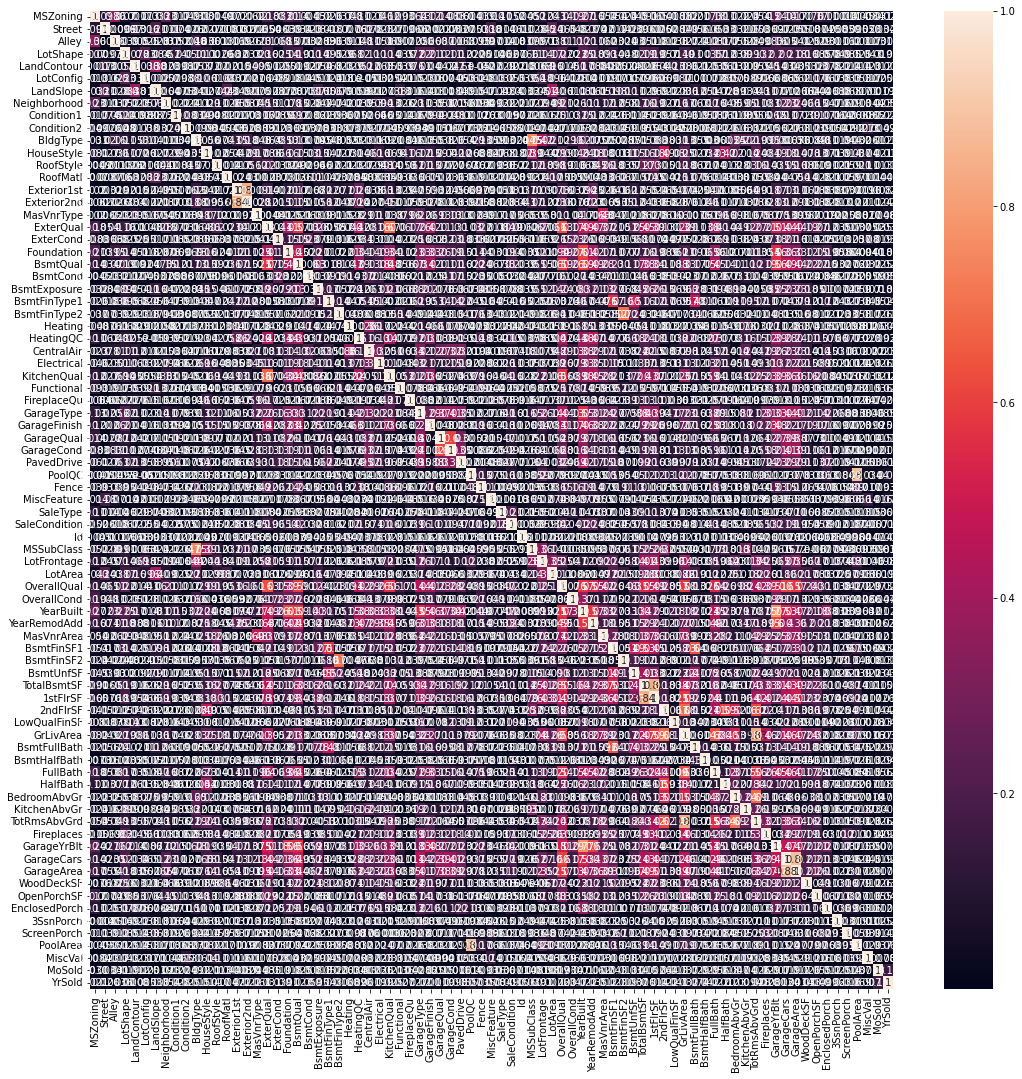

In [285]:
import seaborn as sn
import matplotlib.pyplot as plt

# Before anything, we will drop the two columns with constant values,
# because they mess with the correlation matrix. Comment out these 2 lines
# below to see it for yourself
X_train.drop(columns=['Utilities'], inplace=True)
X_test.drop(columns=['Utilities'], inplace=True)

# create correlation matrix (with absolute values, we don't care if correlation
# is positive or negative)
corrMatrix = X_train.corr().abs()

# plot a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(18,18))
sn.heatmap(corrMatrix, annot=True);

In [286]:
# Select upper triangle of correlation matrix
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

[]

## 8. Select K Best

In [287]:
from sklearn.feature_selection import SelectKBest, f_regression

In [288]:
f_stat, p_val = f_regression(X_train, y_train)

f_test = pd.DataFrame({"f_stat":f_stat, 
                       "p_val":p_val}, 
                      index=X_train.columns)

f_test.sort_values("f_stat", ascending=False)

,f_stat,p_val
OverallQual,1922.824164,6.412489e-249
GrLivArea,1077.898355,5.993906e-168
GarageCars,806.217393,3.081970e-135
ExterQual,791.846974,2.201748e-133
GarageArea,743.613977,4.641887e-127
...,...,...
BsmtFinSF2,0.219568,6.394570e-01
Id,0.111165,7.388815e-01
Condition2,0.083668,7.724388e-01
LandContour,0.014906,9.028472e-01


In [298]:
KBest = SelectKBest(score_func=f_regression, k=13)
KBest

SelectKBest(k=13, score_func=<function f_regression at 0x7fdc0452d320>)

In [299]:
# transform train set
train_X_KBest = KBest.fit_transform(X_train, y_train)

# transform test set
test_X_KBest = KBest.transform(X_test)
print(train_X_KBest.shape, test_X_KBest.shape)

(1168, 13) (292, 13)


In [300]:
# Decision tree
tree = DecisionTreeRegressor() # initialize
tree.fit(train_X_KBest, y_train)
tree_pred = tree.predict(X = test_X_KBest)

# K Nearest neighbors
neigh = KNeighborsRegressor(n_neighbors=1) # initialize with parameters
neigh.fit(train_X_KBest, y_train) # fit to train set
knn_pred = neigh.predict(X = test_X_KBest)

performances.loc["KBest_tree"]= r2_score(y_test, tree_pred)
performances.loc["KBest_knn"] = r2_score(y_test, knn_pred)

performances

,performance
baseline_tree,0.729477
baseline_knn,0.466942
varThreshold_tree,0.737414
varThreshold_knn,0.709478
varThreshold_2_tree,0.741524
varThreshold_2_knn,0.709478
KBest_tree,0.790023
KBest_knn,0.711387
RFE_tree,0.700838


## 9. RFE (Recursive Feature Elimination)

In [301]:
# Decision tree
tree = DecisionTreeRegressor() # initialize
tree.fit(X_train, y_train)
feautre_importances = tree.feature_importances_
column_names = X_train.columns

feat_imp = pd.DataFrame({"feature":column_names,
                         "importance":feautre_importances})

feat_imp.sort_values("importance", ascending=False)

,feature,importance
46,OverallQual,0.582226
58,GrLivArea,0.097551
54,TotalBsmtSF,0.089368
51,BsmtFinSF1,0.042898
56,2ndFlrSF,0.037927
...,...,...
1,Street,0.000000
35,GarageCond,0.000000
73,3SsnPorch,0.000000
25,Heating,0.000000


In [302]:
from sklearn.feature_selection import RFECV

RFE_selector_tree = RFECV(DecisionTreeRegressor())

# Decision tree
RFE_selector_tree.fit(X_train, y_train)
tree_pred = RFE_selector_tree.predict(X = X_test)

performances.loc["RFE_tree"]= r2_score(y_test, tree_pred)

performances

,performance
baseline_tree,0.729477
baseline_knn,0.466942
varThreshold_tree,0.737414
varThreshold_knn,0.709478
varThreshold_2_tree,0.741524
varThreshold_2_knn,0.709478
KBest_tree,0.790023
KBest_knn,0.711387
RFE_tree,0.726512


In [294]:
RFE_selector_tree.get_feature_names_out()

array(['Neighborhood', 'GarageType', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageCars', 'GarageArea', 'OpenPorchSF'], dtype=object)

## 10. Select from model

In [312]:
from sklearn.feature_selection import SelectFromModel

# Initialize the transfomer
select_model_tree = SelectFromModel(DecisionTreeRegressor(), 
                                    threshold=0)

# Fit-transform the train set
train_X_selected_model_tree = select_model_tree.fit_transform(X_train, y_train)

# Transform the test set
test_X_selected_model_tree = select_model_tree.transform(X_test)

In [313]:
print(train_X_selected_model_tree.shape, test_X_selected_model_tree.shape)

(1168, 79) (292, 79)


In [314]:
select_model_tree.get_feature_names_out()

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'Id', 'MSSubClass', 'LotFrontage',
       'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd

In [315]:
# Decision tree
tree = DecisionTreeRegressor() # initialize
tree.fit(train_X_selected_model_tree, y_train)
tree_pred = tree.predict(X = test_X_selected_model_tree)

# K Nearest neighbors
neigh = KNeighborsRegressor(n_neighbors=1) # initialize with parameters
neigh.fit(train_X_selected_model_tree, y_train) # fit to train set
knn_pred = neigh.predict(X = test_X_selected_model_tree)

performances.loc["model_selected_tree"]= r2_score(y_test, tree_pred)
performances.loc["model_selected_knn"] = r2_score(y_test, knn_pred)

performances

,performance
baseline_tree,0.729477
baseline_knn,0.466942
varThreshold_tree,0.737414
varThreshold_knn,0.709478
varThreshold_2_tree,0.741524
varThreshold_2_knn,0.709478
KBest_tree,0.790023
KBest_knn,0.711387
RFE_tree,0.726512
model_selected_tree,0.749953
